In [9]:
from scipy import stats

'ttest_1samp' in [x for x in dir(stats) if x[0] !='_']


# import pandas as pd

# print(help(pd.DataFrame))

True

### 정규성 검정

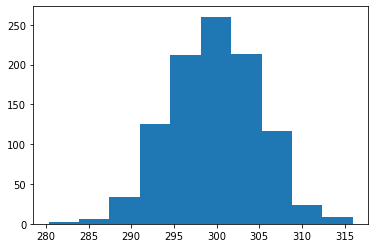

In [10]:
# 문제1. 다음 데이터의 정규성을 검증하라 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [11]:
# 풀이1. 
from scipy.stats import shapiro
print(shapiro(df))

# 샤피로 검정시 p-value가 0.34이므로 유의수준 5%에서 귀무가설("데이터는 정규성을 가진다")을 기각할 수 없다
# 즉, 해당 데이터는 정규성을 가지지 않는다. 

ShapiroResult(statistic=0.9981446862220764, pvalue=0.3485966622829437)


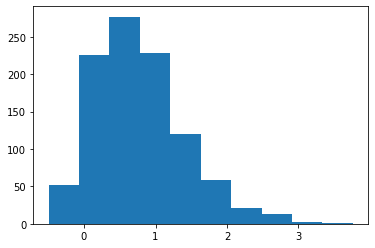

In [14]:
# 문제 2. 다음 데이터의 정규성을 검증하라 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [17]:
from scipy.stats import shapiro

print(shapiro(df))

# 샤피로 검정 시, p-value가 2.3 이므로 유의수준 5%에서 귀무가설('데이터는 정규성을 가진다')를 기각하고 대립가설을 채택한다. 
# 즉, 해당 데이터는 정규성을 가지지 않는다. 

ShapiroResult(statistic=0.9578887224197388, pvalue=2.309859641255865e-16)


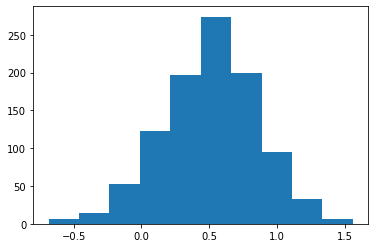

In [12]:
# 문제3. 위의 데이터를 log 변환한 후에 정규성을 가지는지 확인하라 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')

# 로그 변환 
log_y_data = np.log1p(df)

plt.hist(log_y_data)
plt.show()

In [13]:
from scipy.stats import shapiro

print(shapiro(log_y_data))

# 샤피로 검정 시 p-value가 0.175로 유의수준 5%에서 귀무가설('로그변환한 데이터는 정규성을 가진다')를 기각할 수 있다. 
# 즉, 해당 데이터는 정규성을 가진다. 

ShapiroResult(statistic=0.9976891279220581, pvalue=0.17545907199382782)


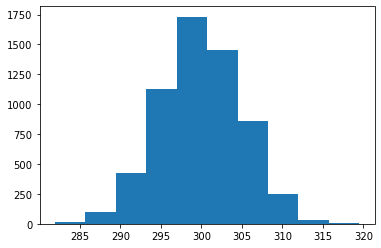

In [18]:
# 문제. 다음 데이터의 정규성을 검증하라 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [19]:
from scipy.stats import shapiro

print(shapiro(df))

# 샤피로 검정 시, p-value가 0.15 이므로 귀무가설('데이터는 정규성을 가진다')를 기각할 수 없다. 
# 즉, 데이터는 정규성을 가진다. 
# 하지만, 경고 메시지와 같이 5000개를 초과하는 샘플에 대해서 샤피로 검정은 정확하지 않을 수 있다. 

ShapiroResult(statistic=0.9995355606079102, pvalue=0.15070641040802002)


c:\Users\yerim\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
from scipy.stats import anderson

# anderson 검정을 실시한다. 
# parameter 에는 array 타입 데이터를 입력해야 한다. 
print(anderson(df['data'].values))

# significance_level: 유의 확률값
# critical_values: 각 유의 확률값의 기준점 
# 유의수준 5% 에서 검정을 진행하려면, significance_level 에서 5.가 위치한 인덱스를 critical_values에서 찾으면 된다. 
# 따라서, 해당 데이터는 유의수준 5%에서 기준점 0.78보다 높은 0.82 값을 가지므로 귀무가설을 기각하고 대립가설을 채택한다. 
# 즉, 해당 데이터는 정규성을 띄지 않는다. 

AndersonResult(statistic=0.8266993530414766, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


### 단일 표본 t검정 (one-sample)

In [26]:
# 문제. 100명의 키 정보가 들어 있는 데이터가 있다. 
# 데이터가 정규성을 만족하는지 확인하라. 
# 그리고 평균 키는 165라 판단할 수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라 

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')


# 풀이1. 
from scipy.stats import shapiro

static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value:', pvalue, '이므로')

# 샤피로 검정 시, p-value가 0.45 이므로 유의수준 5%에서 귀무가설을 기각할 수 없다. 
# 따라서, 해당 데이터는 정규성을 가진다. 

if pvalue < 0.05: 
    print('귀무가설을 기각한다. 대립가설을 채택한다. ')
    print('정규성을 만족하지 않으므로 비모수 검정을 진행한다. ')
    print('윌콕슨 순위 부호 검정을 진행한다. ')
else: 
    print('귀무가설을 기각할 수 없다. ')
    print('윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다."이며')
    print('대립가설은 "100명 키의 평균은 165가 아니다."이다.')


# 풀이2. 



샤피로 정규성 검정 p-value: 0.455832302570343 이므로
귀무가설을 기각할 수 없다. 
윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다."이며
대립가설은 "100명 키의 평균은 165가 아니다."이다.
